<a href="https://colab.research.google.com/github/judeha/deepseacorals/blob/main/DeepSeaCoralAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive/')
path_name = '/content/drive/My Drive/Data/'

Mounted at /content/drive/


In [ ]:
!pip install geopandas

In [ ]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from collections import Counter

In [ ]:
# Load deep coral dataset
data = pd.read_csv(path_name + 'deep_sea_corals.csv')

In [ ]:
data = data.dropna()
data.columns

data.head()

1. Exploratory Analysis

In [ ]:
# A) How many species/locations are there?

# value_counts returns a list of counts for each category, in descending order
# Create new dataframes
species_count = pd.DataFrame(data.ScientificName.value_counts())
vernacular_count = pd.DataFrame(data.VernacularNameCategory.value_counts())
location_count = pd.DataFrame(data.Locality.value_counts())

# Return counts
print("Total number of species: ", len(species_count))
print("Total number of vernacular groups: ", len(vernacular_count))
print("Total number of locations: ", len(location_count))

Total number of species:  497
Total number of vernacular groups:  16
Total number of locations:  348


In [ ]:
vernacular_count.head()

,VernacularNameCategory
gorgonian coral,32132
lace coral,14852
demosponge,13252
glass sponge,11812
stony coral (branching),10957


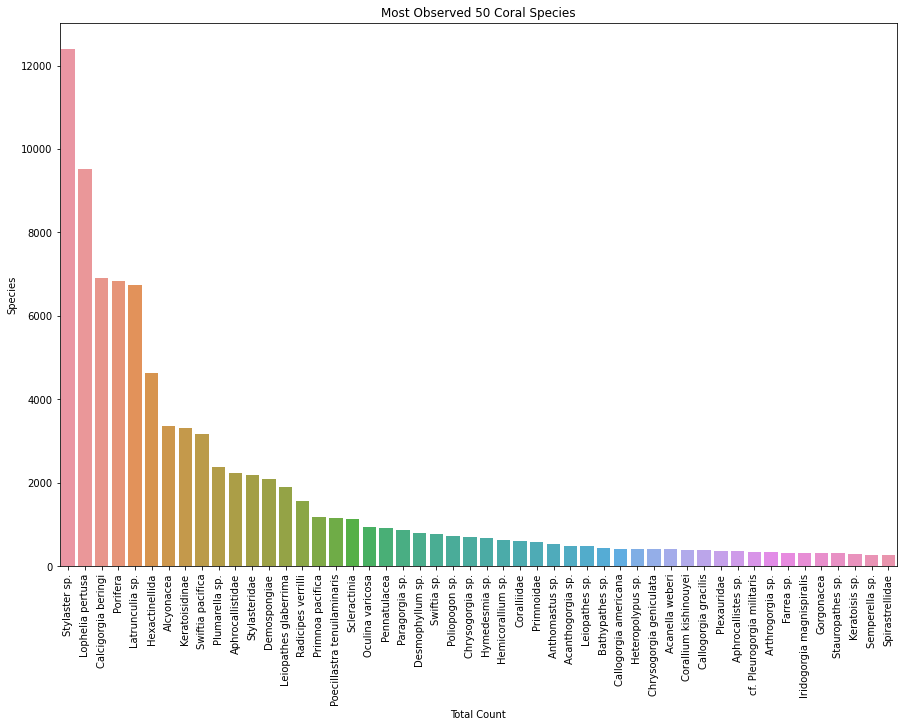

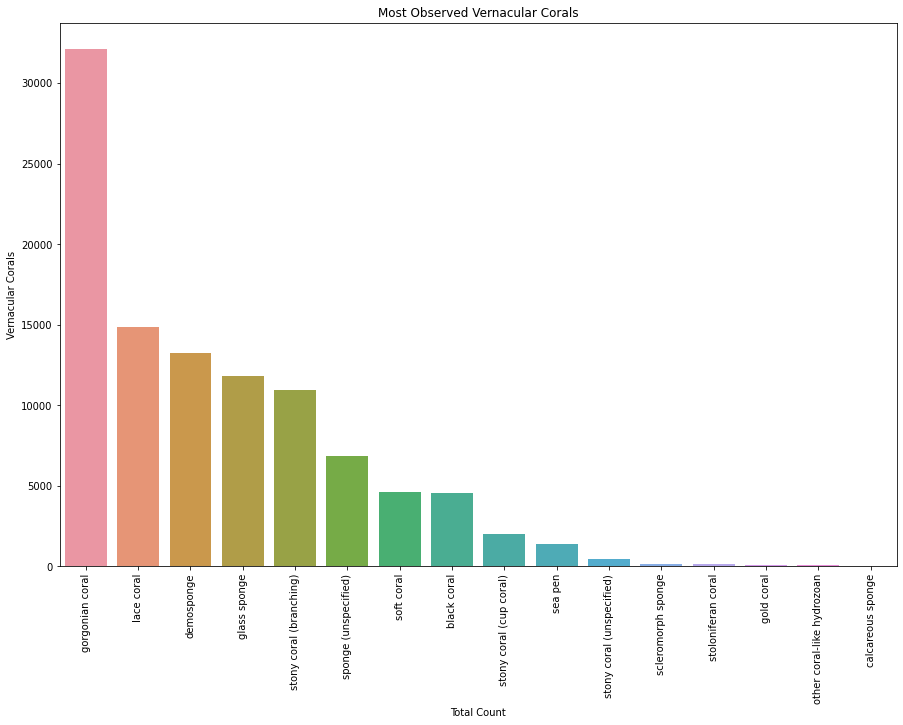

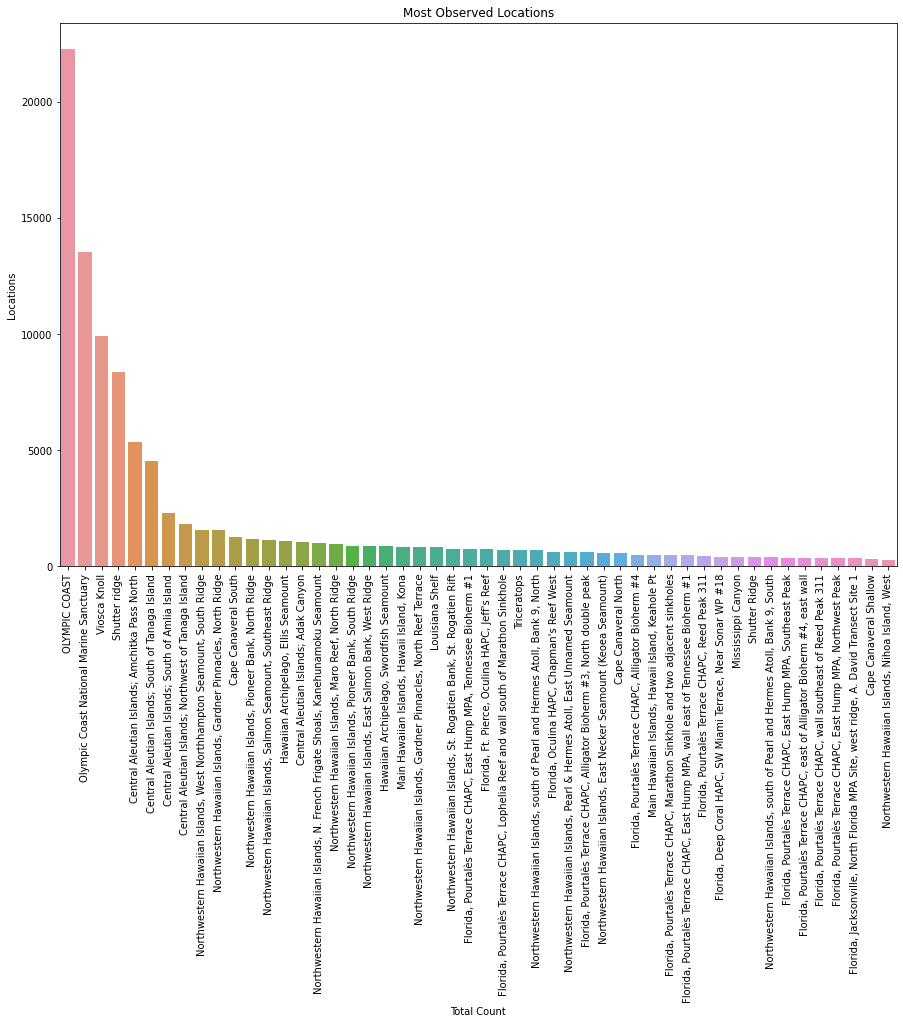

In [ ]:
# B) Plot
def countPlot(dataset, label: str, title: str):
  plt.figure(figsize=(15,10))
  col_name = dataset.columns[0]
  ax = sns.barplot(x=dataset.index, y=dataset[col_name])
  ax.set(xlabel='Total Count', ylabel=label,
           title=title)
  ax.tick_params(axis='x', rotation=90)

countPlot(species_count.head(50), 'Species', 'Most Observed 50 Coral Species')
countPlot(vernacular_count, 'Vernacular Corals', 'Most Observed Vernacular Corals')
countPlot(location_count.head(50), 'Locations', 'Most Observed Locations')

2. Mapping

In [ ]:
print(data.dtypes)
data = data.astype({'latitude': 'float'})
data = data.astype({'longitude': 'float'})

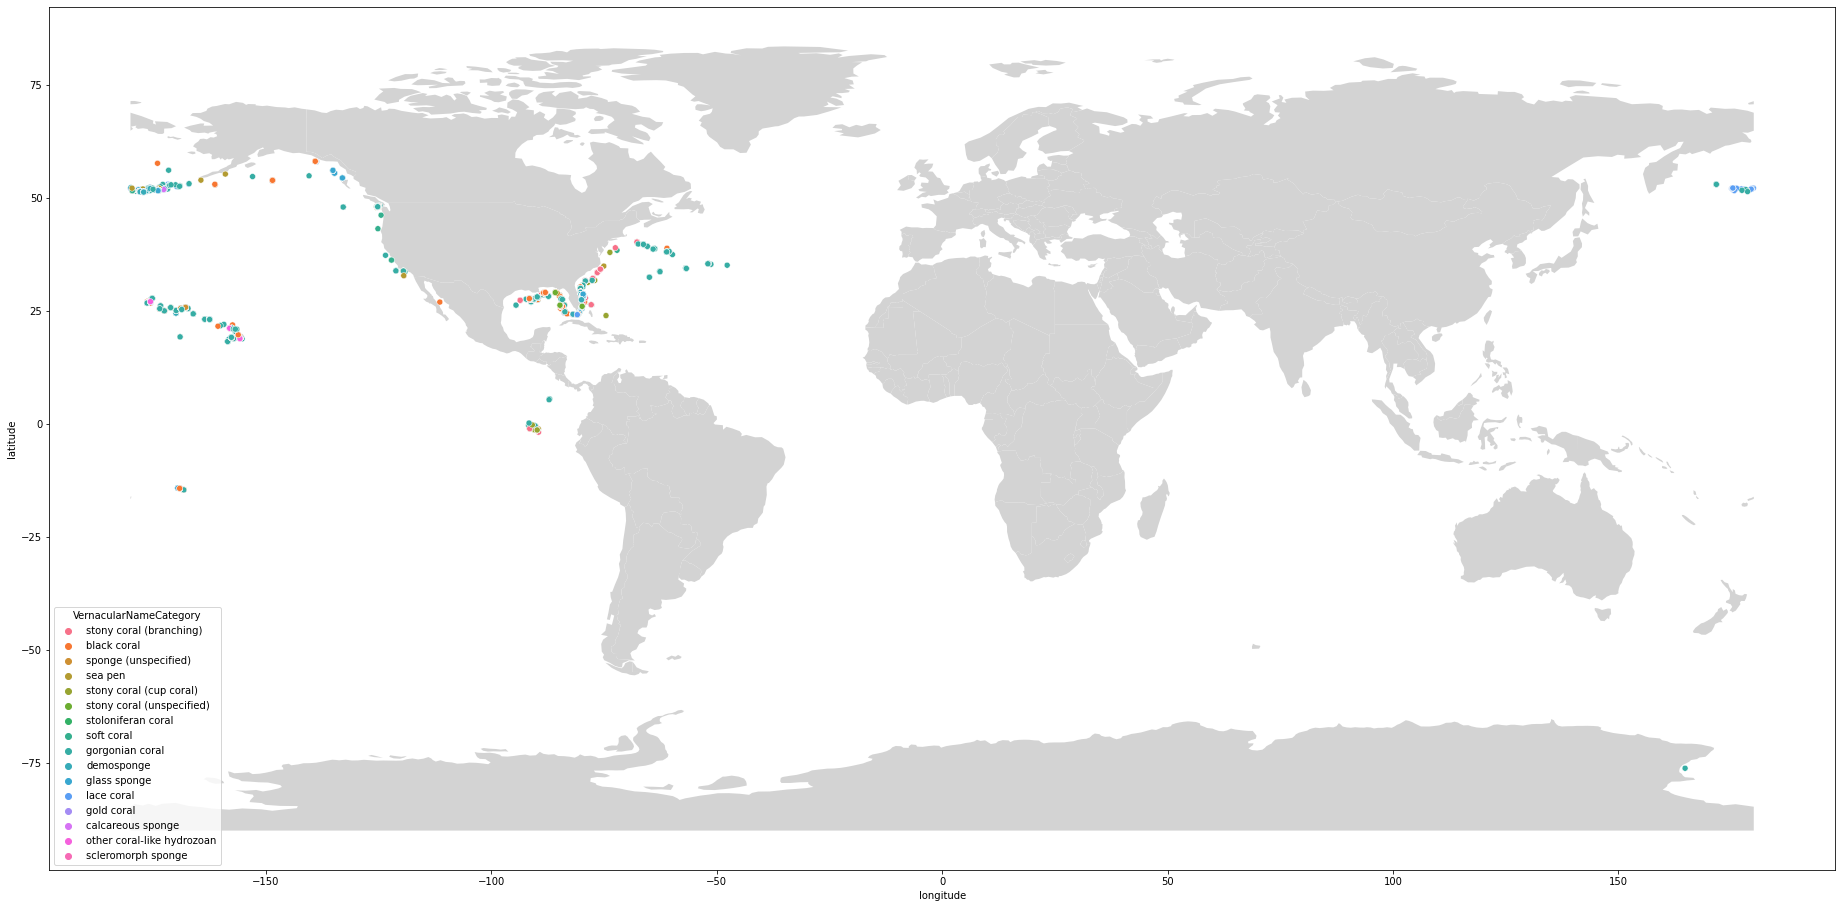

In [ ]:
fig, ax = plt.subplots(figsize=(32,24))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey", ax=ax)

sns.scatterplot(data=data, x='longitude', y='latitude', hue='VernacularNameCategory', ax=ax)

In [ ]:
print(vernacular_count)
uncommon = ['stony coral (cup coral)', 'sea pen', 'stony coral (unspecified)',
                     'scleromorph sponge', 'stoloniferan coral', 'gold coral',
                     'other coral-like hydrozoan', 'calcareous sponge']
common_corals = data[~data['VernacularNameCategory'].isin(uncommon)]
print(common_corals)

In [ ]:
fig, ax = plt.subplots(figsize=(320,240))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey", ax=ax)

sns.scatterplot(data=common_corals, x='longitude', y='latitude', hue='VernacularNameCategory',
                palette='Paired_r', ax=ax)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':
<ipython-inp

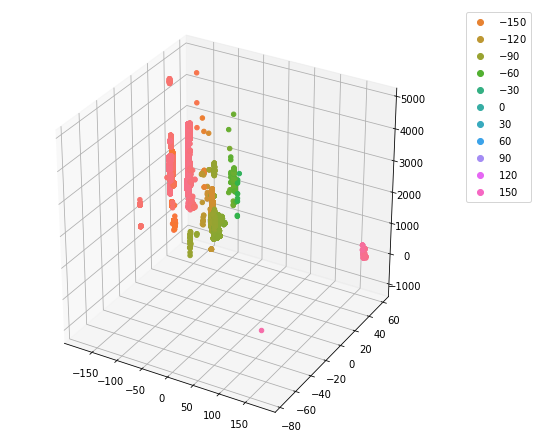

In [ ]:
x=common_corals['longitude']
y=common_corals['latitude']
z=common_corals['DepthInMeters']

sns.scatterplot(x, y, z, hue='VernacularNameCategory',
                palette='Paired_r', ax=ax)

from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)
sc = ax.scatter(x, y, z, c=x, marker='o', cmap=cmap, alpha=1)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)